In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
police_data = pd.read_csv('../police_data.csv')

In [3]:
police_data = police_data.drop(columns=['PdId','Descript','IncidntNum'])

In [137]:
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']

In [5]:
police_data = police_data.where(police_data.Category.isin(focuscrimes))

In [6]:
police_data['Date'] = pd.to_datetime(police_data['Date'], format="%m/%d/%Y")

In [7]:
police_data = police_data[police_data['Date'] >= '2013-01-01']

In [8]:
police_data['Month'] = police_data['Date'].dt.month
police_data['Year'] = police_data['Date'].dt.year
police_data['Day'] = police_data['Date'].dt.day
police_data['Time'] = pd.to_datetime(police_data['Time'], format="%H:%M")
police_data['Hour'] = police_data['Time'].dt.hour
police_data['Minute'] = police_data['Time'].dt.minute
police_data['Time'] = police_data['Time'].dt.time
#police_data['Second'] = police_data['Time'].dt.secondo

In [9]:
robberies = police_data[police_data['Category'] == 'ROBBERY']

In [10]:
drunk = police_data[police_data['Category'] == 'DRUNKENNESS']

In [11]:
dui = police_data[police_data['Category'] == 'DRIVING UNDER THE INFLUENCE']

In [12]:
conduct = police_data[police_data['Category'] == 'DISORDERLY CONDUCT']

In [13]:
dui.head()

,Category,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Year,Day,Hour,Minute
412,DRIVING UNDER THE INFLUENCE,Friday,2013-08-30,23:52:00,BAYVIEW,"ARREST, BOOKED",1200 Block of RHODEISLAND ST,-122.401458,37.753924,POINT (-122.401458491977 37.7539239678382),8,2013,30,23,52
5553,DRIVING UNDER THE INFLUENCE,Saturday,2013-02-09,23:33:00,CENTRAL,"ARREST, BOOKED",500 Block of BROADWAY ST,-122.405863,37.798023,POINT (-122.405863212632 37.7980228452184),2,2013,9,23,33
6254,DRIVING UNDER THE INFLUENCE,Tuesday,2013-01-29,00:38:00,MISSION,"ARREST, BOOKED",CESAR CHAVEZ ST / BARTLETT ST,-122.419169,37.748137,POINT (-122.419169076633 37.7481372527375),1,2013,29,0,38
9004,DRIVING UNDER THE INFLUENCE,Sunday,2013-03-24,15:40:00,SOUTHERN,"ARREST, BOOKED",600 Block of FOLSOM ST,-122.397328,37.785127,POINT (-122.397328066738 37.7851267946007),3,2013,24,15,40
13968,DRIVING UNDER THE INFLUENCE,Tuesday,2013-02-05,23:10:00,SOUTHERN,"ARREST, BOOKED",5TH ST / MARKET ST,-122.408068,37.783992,POINT (-122.408068345148 37.7839916768161),2,2013,5,23,10


In [14]:
hourly_reports = robberies.loc[(robberies['Hour'] >= 14) & (robberies['Hour'] <= 15)]

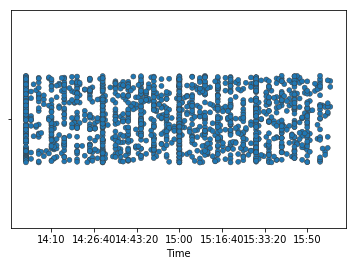

In [15]:
ax = sns.stripplot(x=hourly_reports['Time'], jitter=0.20, linewidth=0.5)

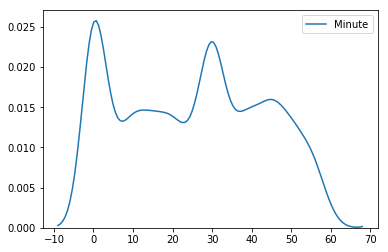

In [16]:
ax = sns.kdeplot(data=hourly_reports['Minute'],bw=3)

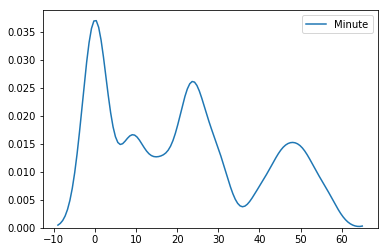

In [17]:
smaller_dataset = hourly_reports.sample(n=25)
ax = sns.kdeplot(data=smaller_dataset['Minute'],bw=3)

In [18]:
dui_lat = dui['X']

In [19]:
robbery_lat = robberies['X']

In [20]:
conduct_lat = conduct['X']

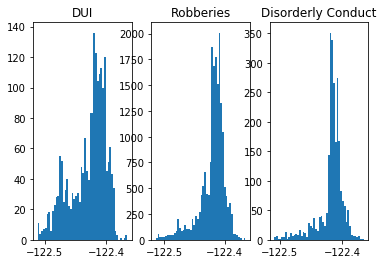

In [21]:
plt.subplot(1,3,1)
plt.title('DUI')
plt.hist(dui_lat,bins=50);
plt.subplot(1,3,2)
plt.title('Robberies')
plt.hist(robbery_lat,bins=50);
plt.subplot(1,3,3)
plt.title('Disorderly Conduct')
plt.hist(conduct_lat,bins=50);

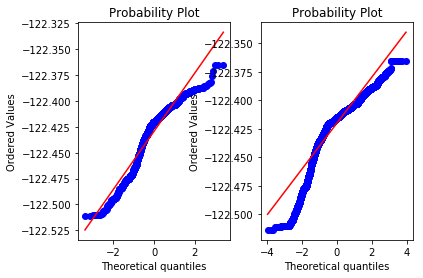

In [22]:
plt.subplot(1,2,1)
plt.title('DUI lat')
stats.probplot(dui_lat, plot=plt);
plt.subplot(1,2,2)
plt.title('Robbery lat')
stats.probplot(robbery_lat, plot=plt);

The probability plot plots how close the data is to a normal distribution - ours seem to fall close to, but then deviate in the higher longitudes. I suspect that the coordinates of DUIs may not be normally distributed, but we can definitely see a pattern around -122.425 for both robberies and DUIs. There, both seem to follow a normal distribution - crimes sort of 'emenates' out from the center. 

In [32]:
assault = police_data[police_data['Category'] == "ASSAULT"] 

In [35]:
assault_count = assault.groupby(['Date']).count()

In [39]:
assault_count.drop(columns=['DayOfWeek', 'PdDistrict', 'Resolution','Address','X','Y','Location'],inplace=True)

In [45]:
assault_count.drop(columns=['Category','Time','Month','Year','Day','Minute'],inplace=True)

In [49]:
ass_series = assault_count.squeeze()

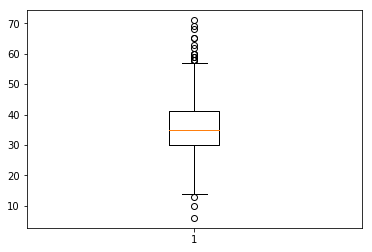

In [51]:
plt.boxplot(ass_series);

In [58]:
scrubbed_p_data = police_data.drop(columns=['DayOfWeek', 'PdDistrict', 'Resolution','Address','X','Y','Location','Time','Month','Year','Day','Hour',
                                           'Minute'])

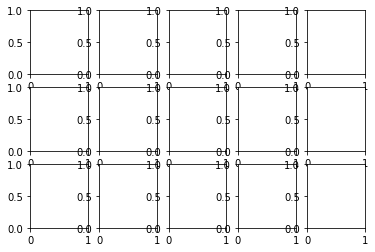

In [102]:
fig, ax = plt.subplots(3,5)

In [138]:
f_c = focuscrimes.copy()
for i in range(3):
    for j in range(5):
        if(len(f_c) > 0):
            crime = f_c.pop()
            print(crime)
            df = scrubbed_p_data[scrubbed_p_data['Category'] == crime]
            df_count = df.groupby(['Date']).count()
            df_series = df_count.squeeze()
            ax[i][j].boxplot(df_series)
            ax[i][j].set_title(crime)
        

DISORDERLY CONDUCT
STOLEN PROPERTY
VEHICLE THEFT
VANDALISM
LARCENY/THEFT
TRESPASS
DRUG/NARCOTIC
DRUNKENNESS
ASSAULT
BURGLARY
ROBBERY
DRIVING UNDER THE INFLUENCE
PROSTITUTION
WEAPON LAWS


In [127]:
fig.set_figheight(30)
fig.set_figwidth(30)

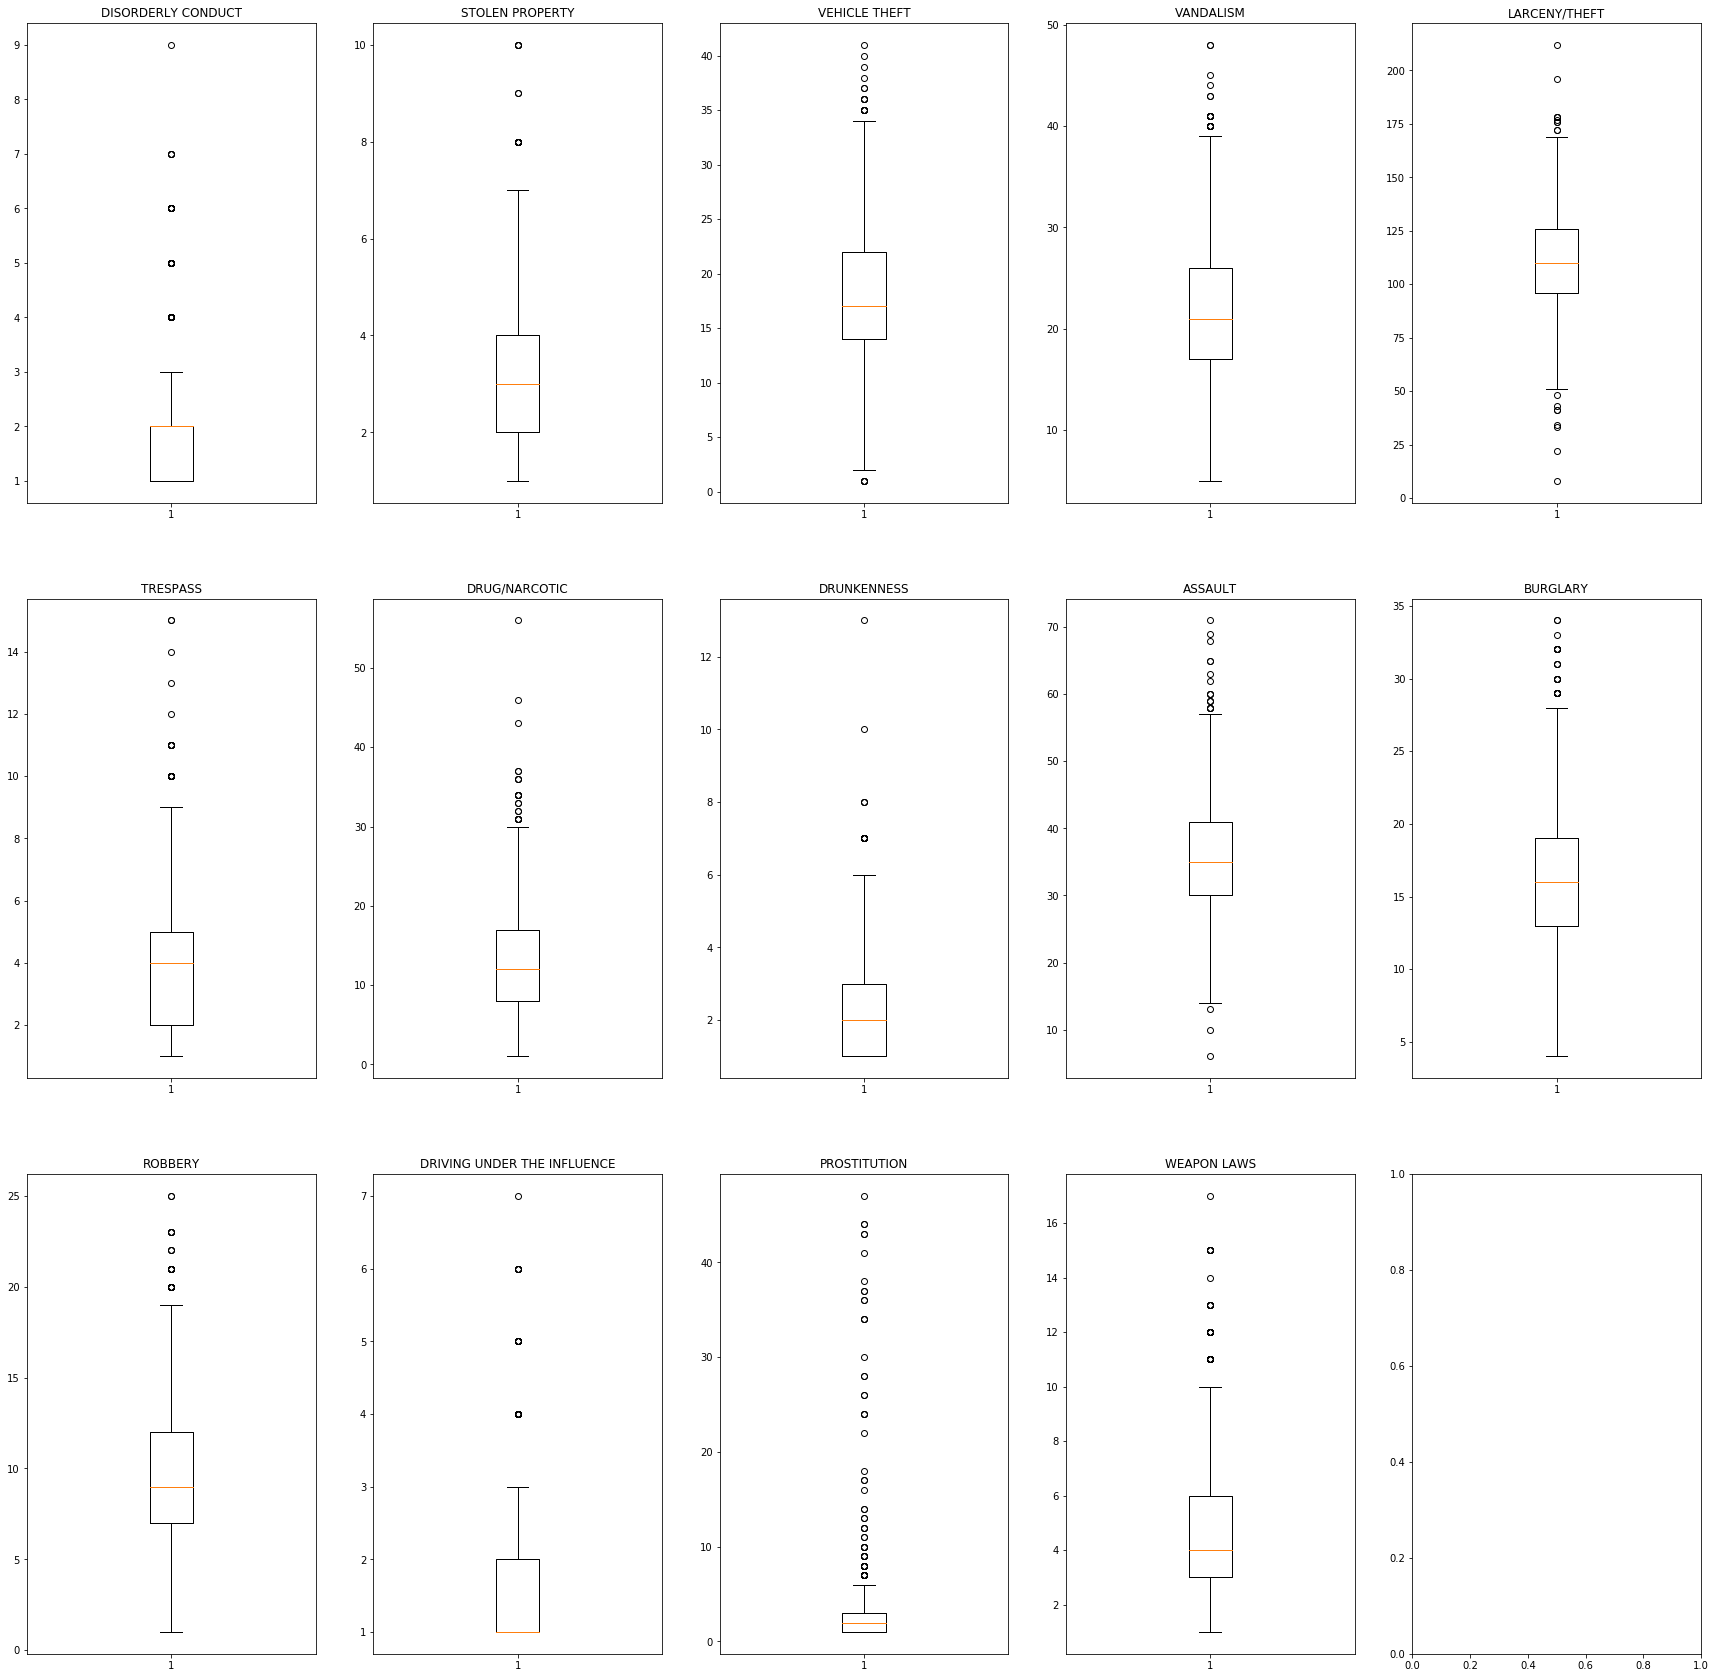

In [134]:
fig

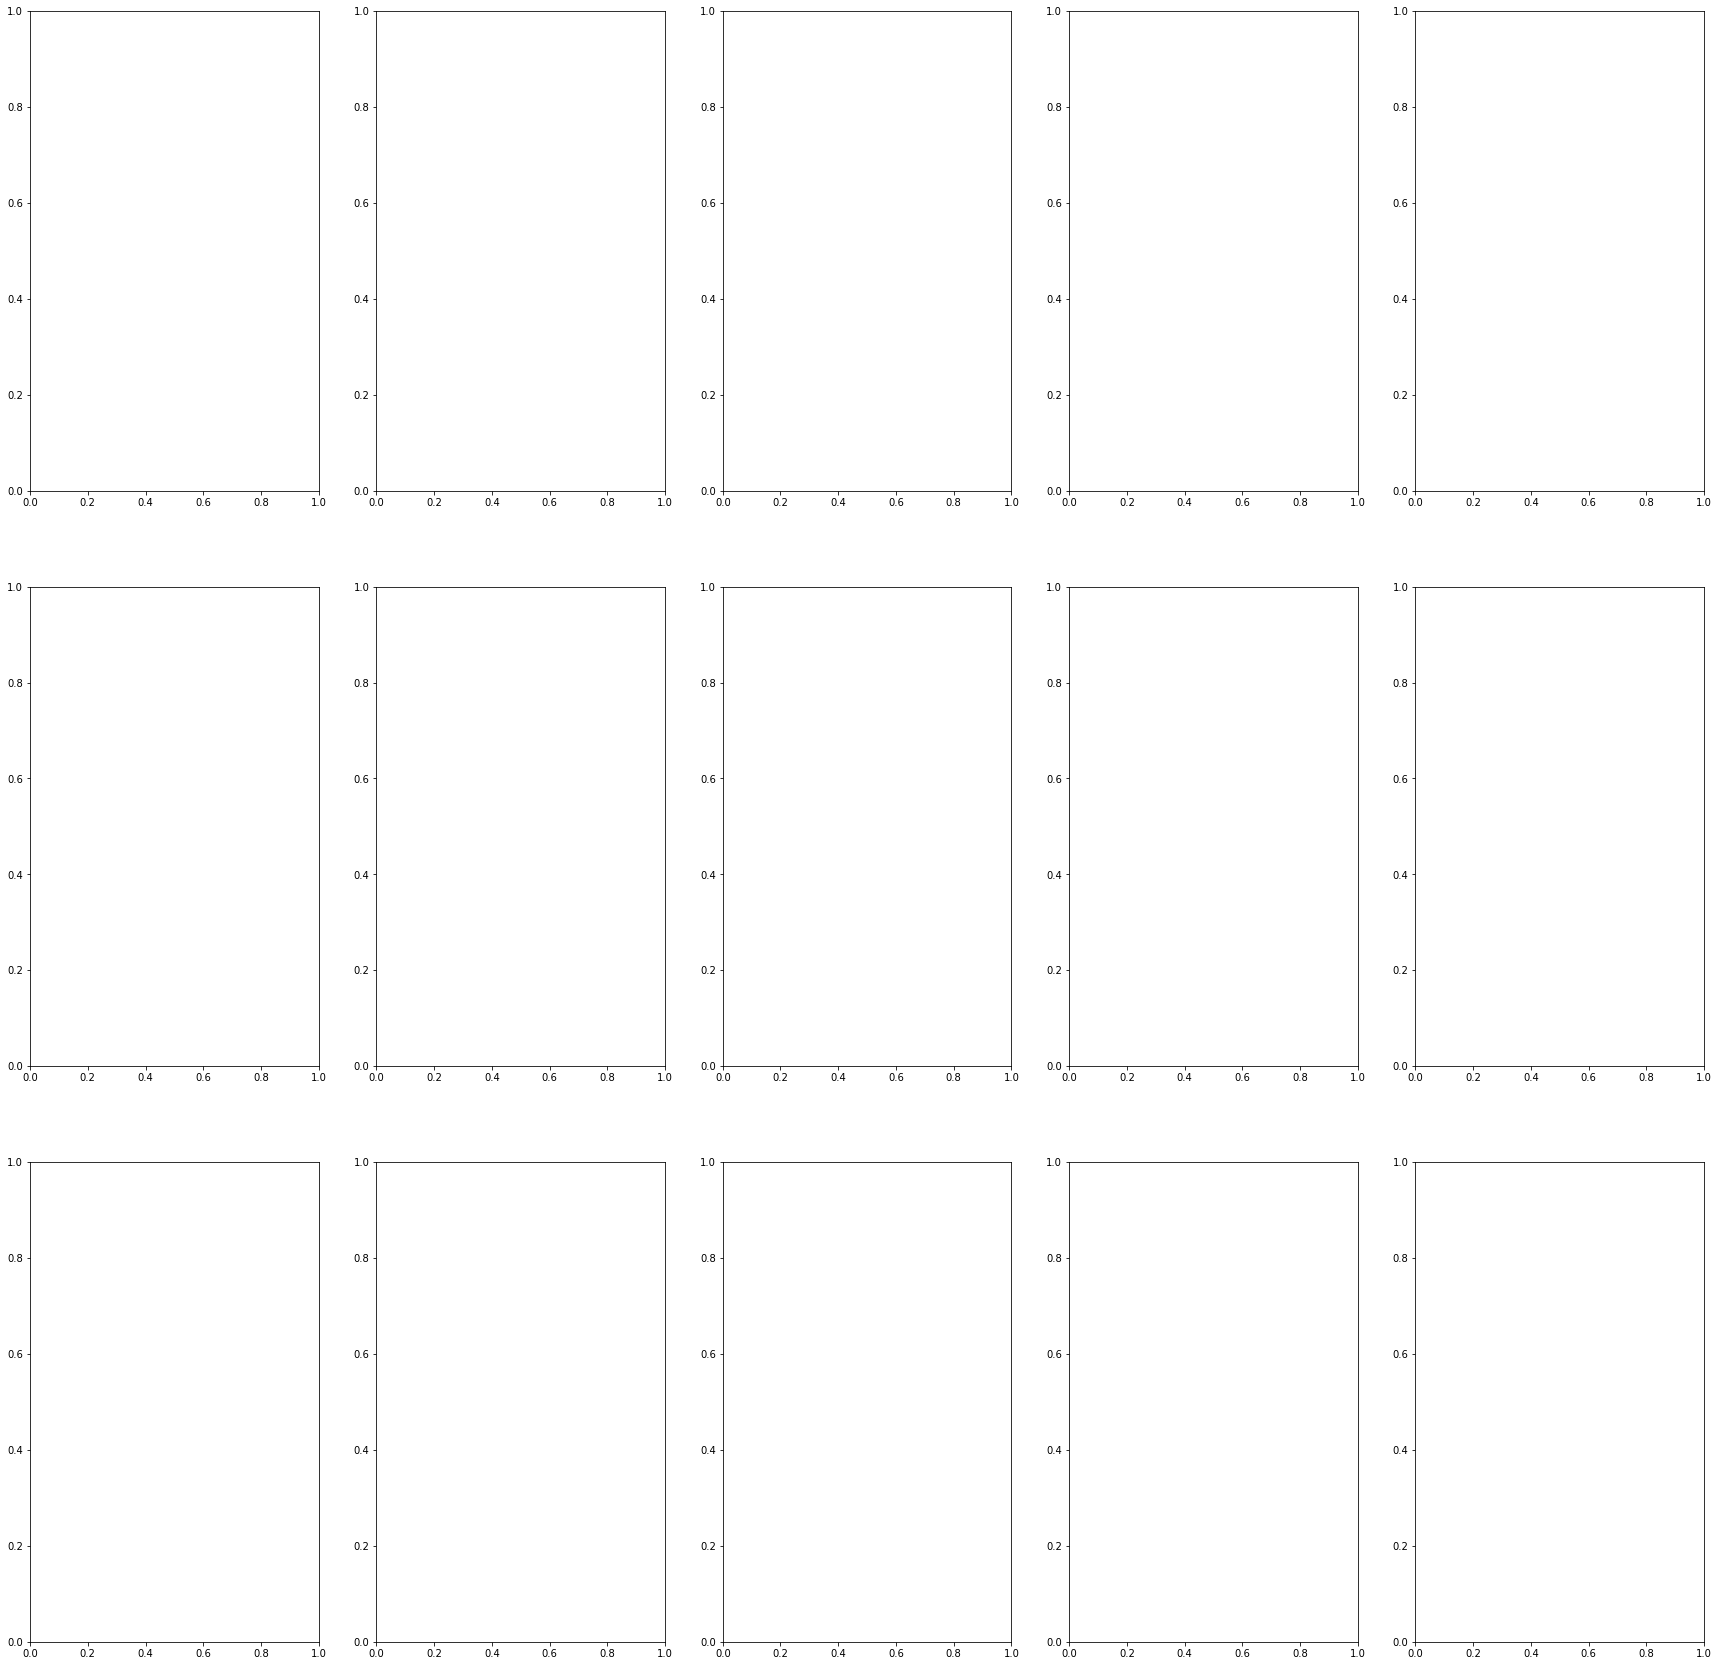

In [144]:
fig, ax = plt.subplots(3,5)
fig.set_figheight(30)
fig.set_figwidth(30)

In [140]:
tester = police_data[police_data['Category'] == 'BURGLARY']

In [141]:
tester.head()

,Category,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Year,Day,Hour,Minute
700,BURGLARY,Saturday,2013-08-17,13:30:00,BAYVIEW,NONE,0 Block of ROBBLEE AV,-122.399098,37.735611,POINT (-122.399097655779 37.7356113108353),8,2013,17,13,30
1124,BURGLARY,Wednesday,2015-02-04,16:01:00,CENTRAL,NONE,100 Block of MAIDEN LN,-122.405933,37.788184,POINT (-122.405933099548 37.7881841508921),2,2015,4,16,1
1942,BURGLARY,Sunday,2013-11-17,04:22:00,PARK,NONE,1600 Block of WALLER ST,-122.451099,37.768463,POINT (-122.451098959125 37.7684634857937),11,2013,17,4,22
2033,BURGLARY,Monday,2013-10-14,04:30:00,SOUTHERN,NONE,0 Block of 5TH ST,-122.407383,37.783372,POINT (-122.407382686506 37.7833716368249),10,2013,14,4,30
2068,BURGLARY,Wednesday,2013-09-11,02:20:00,RICHMOND,"ARREST, BOOKED",600 Block of ARGUELLO BL,-122.458754,37.778668,POINT (-122.458753852199 37.778667674124),9,2013,11,2,20


In [143]:
tester['SecsSinceMidn'] = (tester['Hour'] * 60 * 60) + (tester['Minute'] * 60) 
tester.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Category,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Year,Day,Hour,Minute,SecsSinceMidn
700,BURGLARY,Saturday,2013-08-17,13:30:00,BAYVIEW,NONE,0 Block of ROBBLEE AV,-122.399098,37.735611,POINT (-122.399097655779 37.7356113108353),8,2013,17,13,30,48600
1124,BURGLARY,Wednesday,2015-02-04,16:01:00,CENTRAL,NONE,100 Block of MAIDEN LN,-122.405933,37.788184,POINT (-122.405933099548 37.7881841508921),2,2015,4,16,1,57660
1942,BURGLARY,Sunday,2013-11-17,04:22:00,PARK,NONE,1600 Block of WALLER ST,-122.451099,37.768463,POINT (-122.451098959125 37.7684634857937),11,2013,17,4,22,15720
2033,BURGLARY,Monday,2013-10-14,04:30:00,SOUTHERN,NONE,0 Block of 5TH ST,-122.407383,37.783372,POINT (-122.407382686506 37.7833716368249),10,2013,14,4,30,16200
2068,BURGLARY,Wednesday,2013-09-11,02:20:00,RICHMOND,"ARREST, BOOKED",600 Block of ARGUELLO BL,-122.458754,37.778668,POINT (-122.458753852199 37.778667674124),9,2013,11,2,20,8400


In [145]:
f_c = focuscrimes.copy()
for i in range(3):
    for j in range(5):
        if(len(f_c) > 0):
            crime = f_c.pop()
            df = police_data[police_data['Category'] == crime]
            df['SecsSinceMid'] = (df['Hour'] * 60 * 60) + (df['Minute'] * 60) 
            df = df['SecsSinceMid']
            df_series = df.squeeze()
            ax[i][j].boxplot(df_series)
            ax[i][j].set_title(crime)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


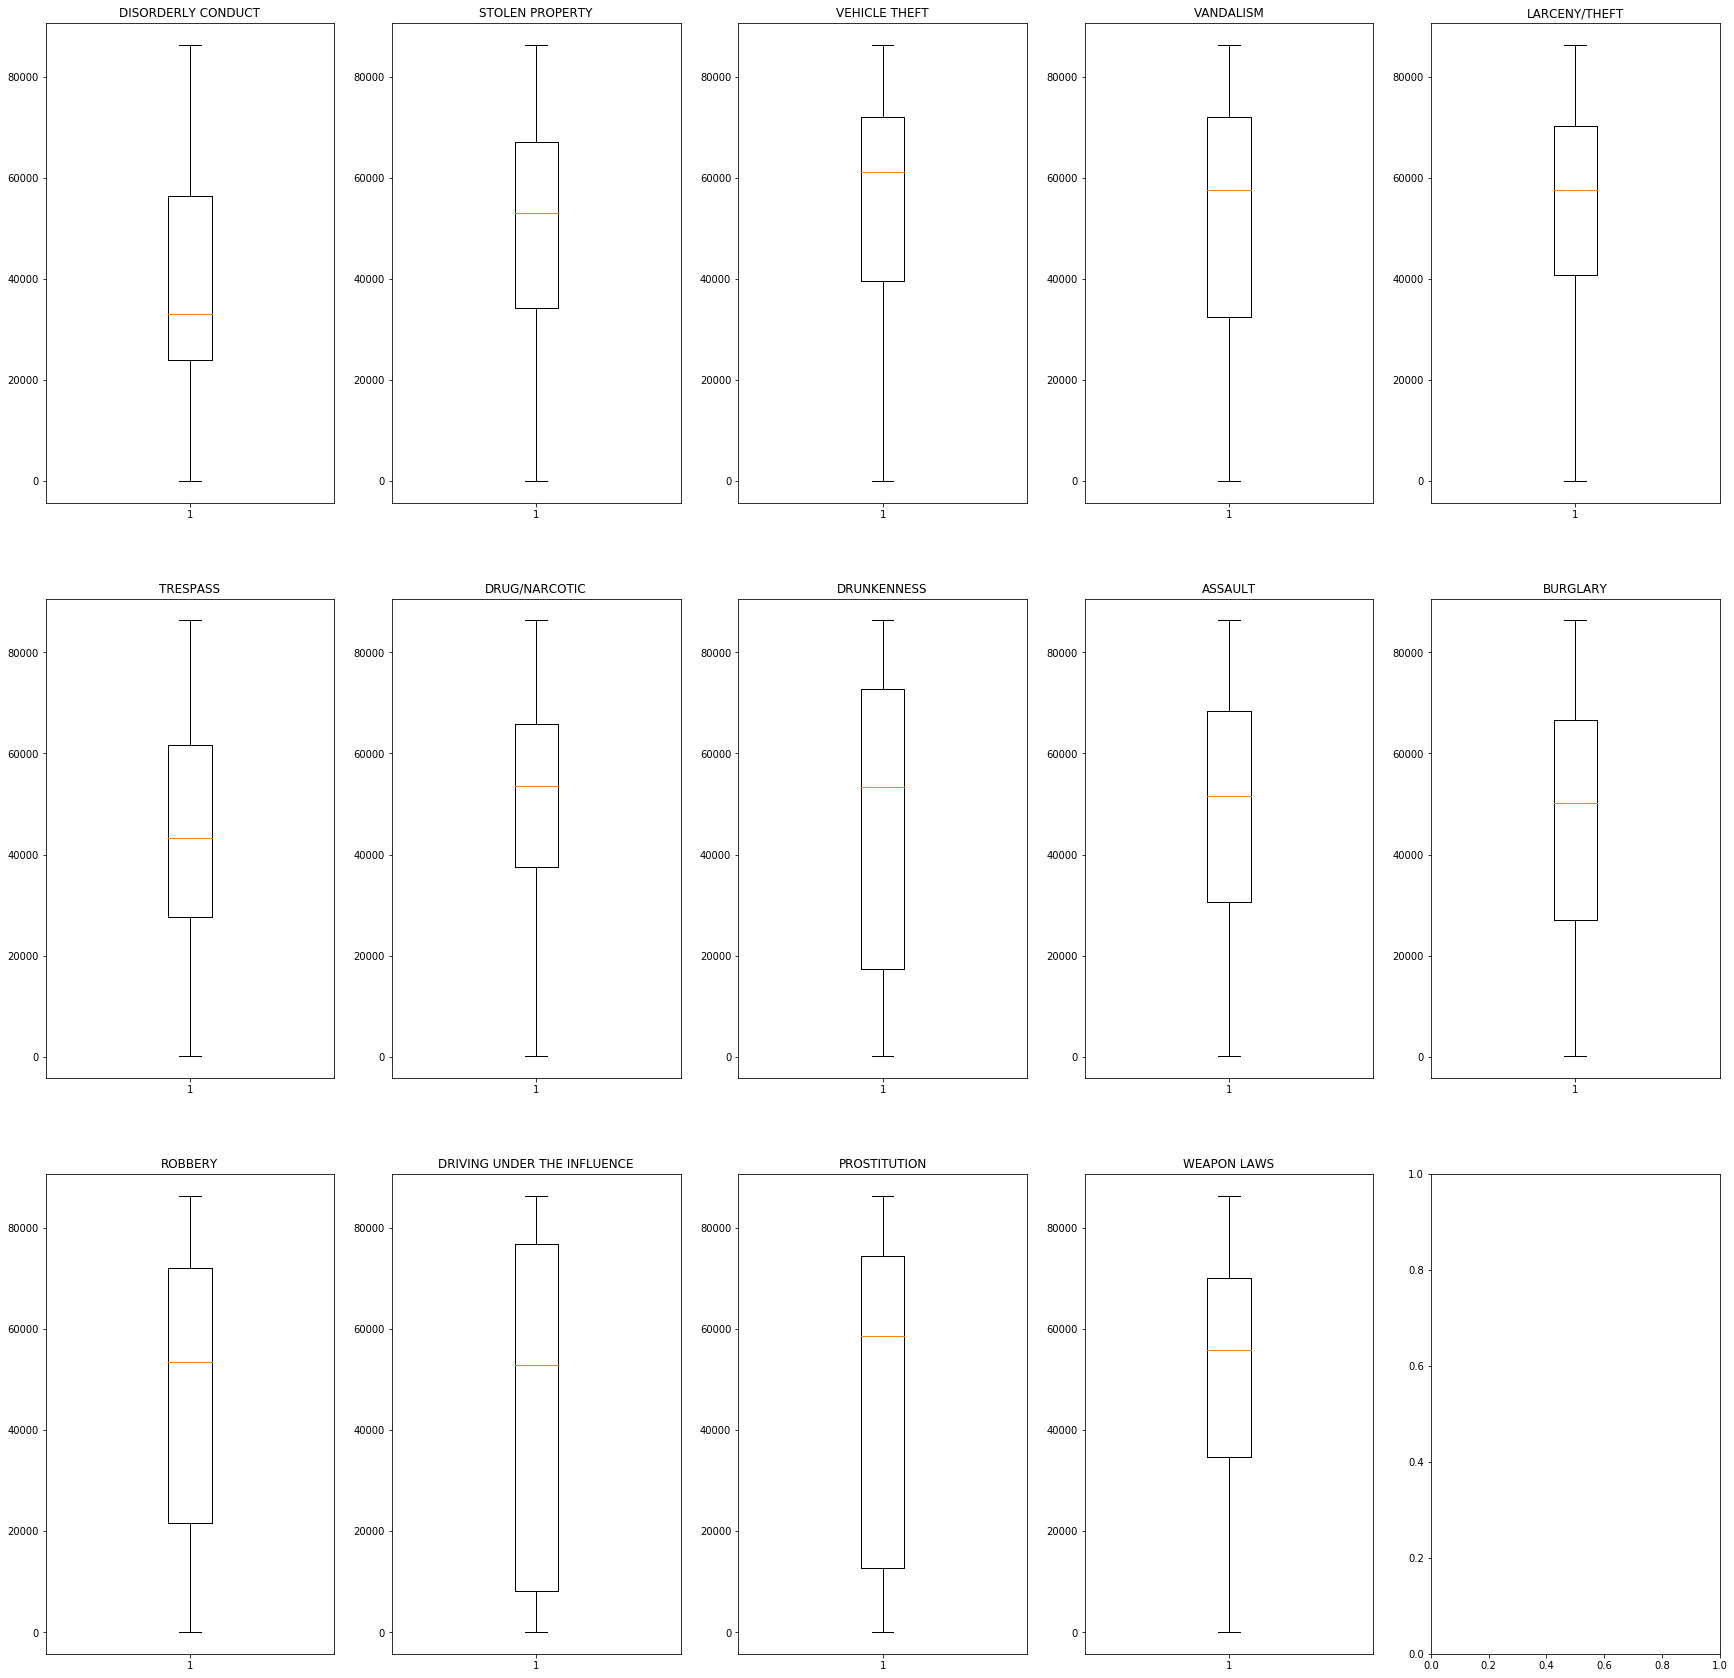

In [146]:
fig